# TMDB Movies Data Analysis
For my project i decided to select this dataset to try my skills with it.
a lot of questions could be asked since this is a big dataset like for example:
    1. does the movie length affect its profit and popularity ? 
    2. how many profitable\nonprofitable movies have been produced,
       how many director have been involved ?
    3. which movie made the most/least profit ? 
more will be asked later on while exploring the dataset 



In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline


In [179]:
def plot_title(title):
    title = plt.suptitle(title.title(),fontsize=20);
    return title

Basic exploration

In [113]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# id, imdb_id, homepage, tagline, keywords wouldnt fit for this analysis and the questions asked previously

In [115]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords'],axis = 'columns',inplace=True)  #also axis = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


After removal of the intended columns, the dataset looks like a lil better 

# Looking for duplicates and removing them

In [116]:
df.duplicated().sum()       #checking duplicates

1

In [117]:
df.drop_duplicates(inplace=True)    #removing the duplicates
df.duplicated().sum()

0

In [118]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00
mean,0.65,14624286.06,39826896.08,102.07,217.40,5.98,2001.32,17549894.04,51369001.76
std,1.00,30914284.61,117008277.46,31.38,575.64,0.94,12.81,34307526.66,144638333.13
min,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,0.71,15000000.00,24000000.00,111.00,146.00,6.60,2011.00,20853251.08,33701729.01
max,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


# budget, revenue, budjet_adj, revenue_adj and runtime with 0$ and mins respectatively
and since the first question is about profit, these 0 values would render the analysis useless.
# changing the 0 valuse to null.

In [119]:
mask = df.query('budget==0')      #mask not used later on, just to get the items with 0 budget 
mask

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.93,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.40,2015,0.00,27006774.88
36,3.36,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.20,2015,0.00,20566197.19
72,2.27,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.50,2015,0.00,42223.38
74,2.17,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.10,2015,0.00,0.00
75,2.14,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.70,2015,0.00,0.00
88,1.96,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.60,2015,0.00,1839999.19
92,1.88,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.40,2015,0.00,0.00
95,1.84,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.70,2015,0.00,215055014.14
100,1.72,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.00,2015,0.00,0.00
101,1.66,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.40,2015,0.00,0.00


In [120]:
df = df.replace(0, np.NAN)    #stack exchange, this change the 0's to null so it can be removed 

In [121]:
df.isnull().sum().sum()

24632

In [122]:
df.dropna(inplace=True)

In [123]:
df.info()  # uniforming the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
overview                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: float64(7), int64(2), object(7)
memory usage: 505.4+ KB


# alot of null values dropped changing the file from 10k items to 4k

just a simple plotting to try and find relations between different columns

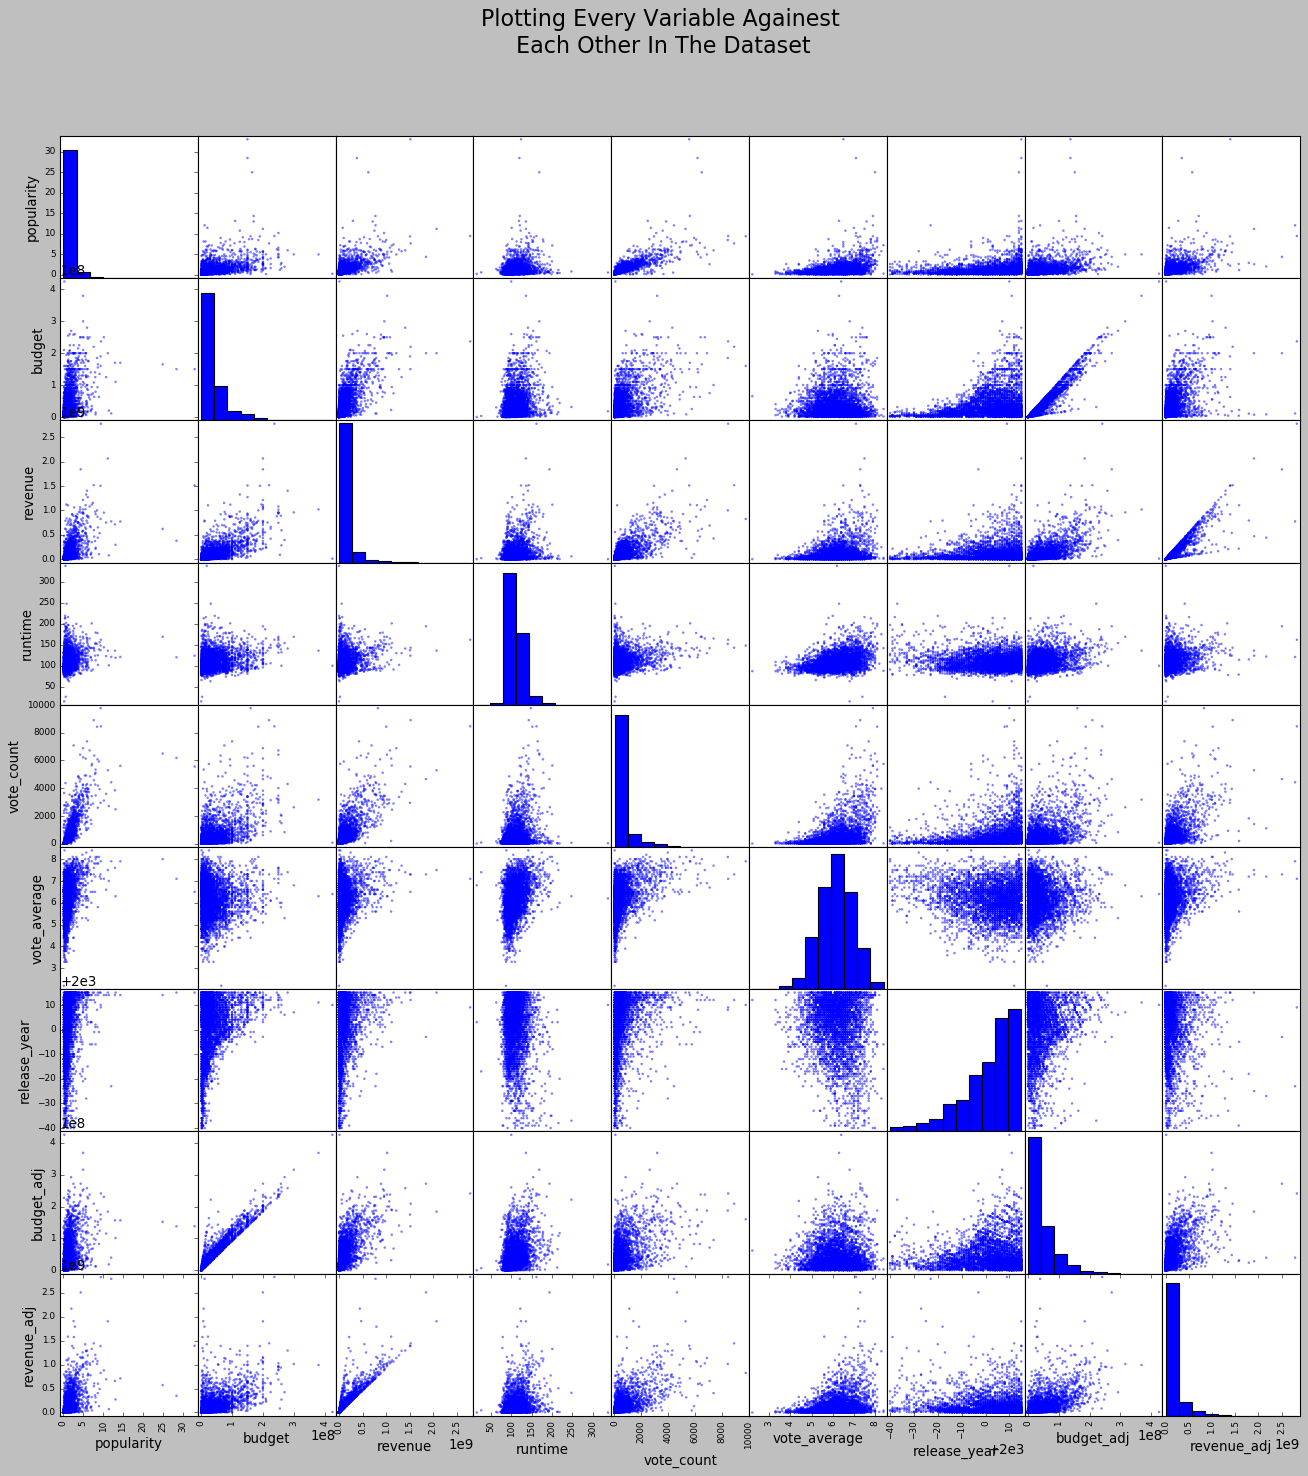

In [180]:
title = 'Plotting every variable againest\n each other in the dataset'
pd.plotting.scatter_matrix(df, figsize=(20,20));
plot_title(title)
ax;

In [125]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00
mean,1.20,37607996.56,108973391.99,109.35,534.16,6.17,2001.23,44719765.29,138715934.35
std,1.48,42321790.88,177297589.91,19.85,883.76,0.79,11.33,44886971.83,216997311.36
min,0.01,1.00,2.00,15.00,10.00,2.20,1960.00,0.97,2.37
25%,0.47,10000000.00,14333790.00,96.00,74.00,5.70,1995.00,13546369.28,19253711.02
50%,0.81,25000000.00,46216641.00,106.00,209.00,6.20,2004.00,30383599.01,62846878.29
75%,1.39,50000000.00,126069509.00,119.00,584.00,6.70,2010.00,60841527.99,165805400.34
max,32.99,425000000.00,2781505847.00,338.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


# What kinds of properties are associated with movies that have high revenues?


# lets check :
    1. profit
    2. runtime
    3. vote_count
    
    

# 1. Profit

In [126]:
# df['profit'] = df.revenue - df.budget    could have been way easier, Thanks to the reviewer 
# df[['profit','revenue', 'budget']]       then slicing it like this, much easier.
profit = df.revenue - df.budget      
profit.head()

0   1363528810.00
1    228436354.00
2    185238201.00
3   1868178225.00
4   1316249360.00
dtype: float64

In [127]:
data = [df, profit]                         
df_combined =pd.concat(data, axis=1, join = 'outer')
df_combined.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,0
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,1363528810.00
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,228436354.00
2,13.11,110000000.00,295238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,185238201.00
3,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,1868178225.00
4,9.34,190000000.00,1506249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,1316249360.00


In [128]:
df_combined.info()      # making sure that new column added correctly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 17 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
overview                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
0                       3805 non-null float64
dtypes: float64(8), int64(2), object(7)
memory usage: 535.1+ KB


In [129]:
df_combined.rename({0:'profit'}, axis=1,inplace= True)    #chanigng the name to a nicer one.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 17 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
overview                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
profit                  3805 non-null float64
dtypes: float64(8), int64(2), object(7)
memory usage: 535.1+ KB


In [130]:
df_combined.to_csv('edited_movies.csv', index=False)    #saving to new file

In [131]:
df_movies= pd.read_csv('edited_movies.csv')   #reading the new file.
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,1363528810.00
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,228436354.00
2,13.11,110000000.00,295238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,185238201.00
3,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,1868178225.00
4,9.34,190000000.00,1506249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,1316249360.00


# whats the different characteristics between high and low profit movies ?

In [132]:
profit_mean = df_movies.profit.mean()
profit_mean

71365395.432063073

In [133]:
low_profit = df_movies.query("profit < {}".format(profit_mean))
high_profit = df_movies.query("profit >= {}".format(profit_mean))

now we splitted the data to movies with high and low profits so we can start comparing the properties of each one of them


In [134]:
low_profit.max()

popularity                                                          11.42
budget                                                       425000000.00
revenue                                                      284139100.00
original_title                                      ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰
cast                    Zoe Sloane|Jade Viggiano|Amancaya Aguilar|Kahi...
director                                                Ã‰mile Gaudreault
overview                Zoe Saldana plays a young woman who, after wit...
runtime                                                            338.00
genres                                                   Western|Thriller
production_companies                                                 icon
release_date                                                       9/9/97
vote_count                                                           5923
vote_average                                                         8.40
release_year                          

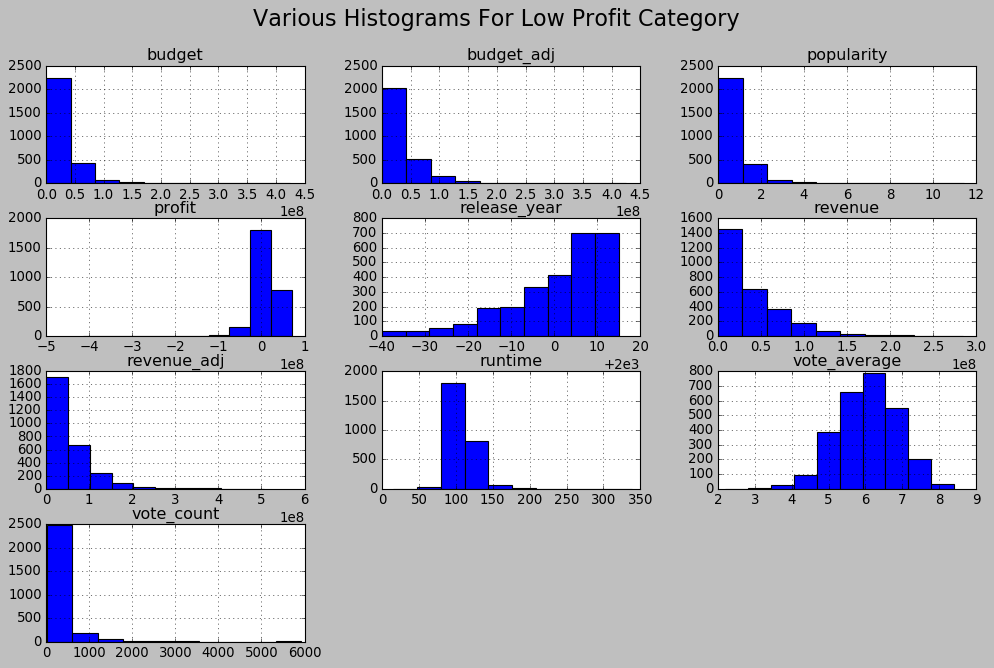

In [181]:
low_profit.hist(figsize=(15,9));
title='various histograms for low profit category'
plot_title(title)
ax;

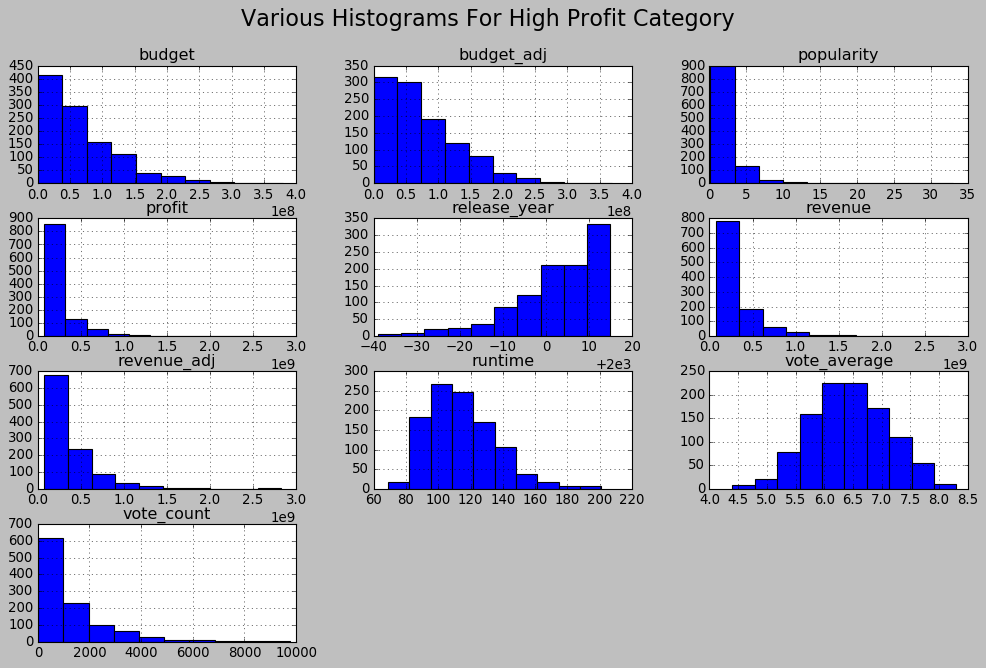

In [173]:
high_profit.hist(figsize=(15,9));
plt.suptitle('various histograms for high profit category'.title(),fontsize=20);
ax;

# 2.Runtime

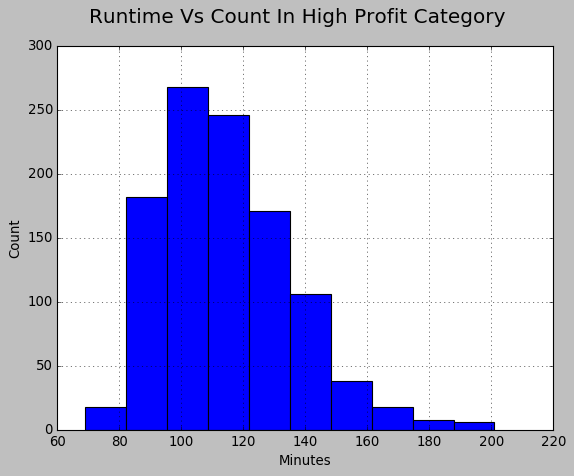

In [169]:
title = ('Runtime vs count in high profit category'.title(),fontsize=18);
plot_title(title)
ax =high_profit.runtime.hist();
ax.set_xlabel('minutes'.title());
ax.set_ylabel('count'.title());
ax;

In [138]:
high_profit.runtime.max()

201.0

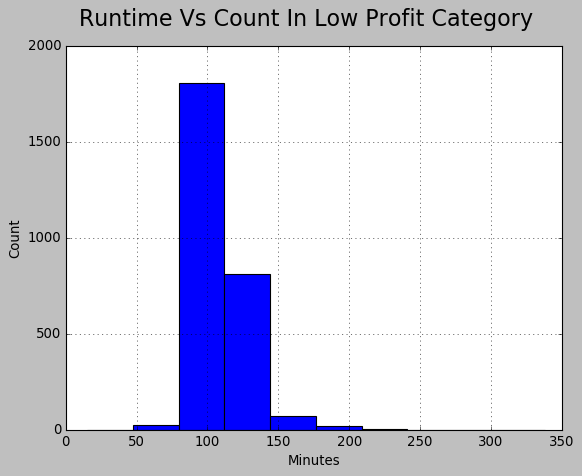

In [183]:
ax = low_profit.runtime.hist();
title = 'Runtime vs count in low profit category'
plot_title(title)
ax.set_xlabel('minutes'.title());
ax.set_ylabel('count'.title());
ax;

In [140]:
low_profit.runtime.max()

338.0

# thats around 5 hours , thats might be a good reason for that movies to be in the low_profit ones lets check its name and genre 

# 3.Vote count

In [141]:
low_profit.query('runtime == 338.0') #max runtime movie in the low profit category

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
649,0.53,18000000.00,871279.00,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,"The story of Venezuelan revolutionary, Ilich R...",338.00,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,5/19/10,35,6.20,2010,18000000.00,871279.00,-17128721.00


In [142]:
high_profit.query('runtime == 201.0')  # max runtime movie in the high profit category

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1625,7.12,94000000.00,1118888979.00,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Aragorn is revealed as the heir to the ancient...,201.00,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,12/1/03,5636,7.90,2003,111423148.61,1326278010.48,1024888979.00


In [143]:
low_profit.vote_count.sum()

697063

In [144]:
high_profit.vote_count.sum()

1335412

# a huge diff in the vote_count between both 

# and as we can see from the above figures the vote counts for high_profit movies is higher than the low_profit ones
# and thats will not be a good factor to use in comparison

In [145]:
mask_high = high_profit.groupby(['director','genres'],as_index=False)['release_year'].max()
mask_high.nunique()

director        538
genres          463
release_year     52
dtype: int64

In [146]:
high_sum = high_profit.profit.sum()
high_sum

243673869430.0

in a span of 52 years a total number of 538 directors made movies of 463 genres profiting 243673869430.0 $

In [147]:
mask_low = low_profit.groupby(['director','genres'],as_index=False)['release_year'].max()
mask_low.nunique()

director        1494
genres           820
release_year      56
dtype: int64

In [148]:
low_sum = low_profit.profit.sum()
low_sum

27871460189.0

while the low profit movies made 27871460189.0 in a span of 56 yeats by 1494 director of 820 genres
a huge different noticed 

In [149]:
high_profit.director.groupby(high_profit.profit).sum().max()

'Zack Snyder'

In [150]:
low_profit.director.groupby(low_profit.profit).sum().min()

' FrÃ©dÃ©ric Jardin'

'Zack Snyder' is more profitable director than ' FrÃ©dÃ©ric Jardin'

In [151]:
high_profit.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1061.00,1061.00,1061.00,1061.00,1061.00,1061.00,1061.00,1061.00,1061.00,1061.00
mean,2.20,66580459.26,296244803.68,114.69,1258.64,6.44,2002.51,75252940.32,367661830.19,229664344.42
std,2.26,55563868.97,246295664.37,20.97,1301.05,0.70,10.57,55498641.33,297806025.53,213158664.90
min,0.13,113.00,76578641.00,69.00,14.00,4.40,1961.00,224.80,73806944.53,71446075.00
25%,1.05,25000000.00,147880543.00,99.00,389.00,6.00,1997.00,31657302.86,178637114.29,103403799.00
50%,1.62,50000000.00,214034224.00,112.00,789.00,6.40,2005.00,61733378.29,271619025.41,153887717.00
75%,2.59,90000000.00,352927224.00,127.00,1666.00,6.90,2011.00,106633784.69,449076041.48,264692268.00
max,32.99,380000000.00,2781505847.00,201.00,9767.00,8.30,2015.00,368371256.18,2827123750.41,2544505847.00


In [152]:
low_profit.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2744.00,2744.00,2744.00,2744.00,2744.00,2744.00,2744.00,2744.00,2744.00,2744.00
mean,0.82,26405451.76,36562689.44,107.29,254.03,6.07,2000.73,32913752.64,50191300.42,10157237.68
std,0.73,28994062.74,36616940.71,19.00,384.03,0.80,11.57,33224671.65,53988257.62,27916904.53
min,0.01,1.00,2.00,15.00,10.00,2.20,1960.00,0.97,2.37,-413912431.00
25%,0.40,7000000.00,8785860.75,95.00,51.00,5.50,1995.00,10296366.88,11295693.48,-5768440.50
50%,0.64,18000000.00,25519165.50,104.00,128.00,6.10,2004.00,22995089.03,34099941.95,5380698.50
75%,1.01,35000000.00,54967017.75,116.00,300.25,6.60,2010.00,44134722.65,73268300.44,26872652.75
max,11.42,425000000.00,284139100.00,338.00,5923.00,8.40,2015.00,425000000.00,506179253.54,71155843.00


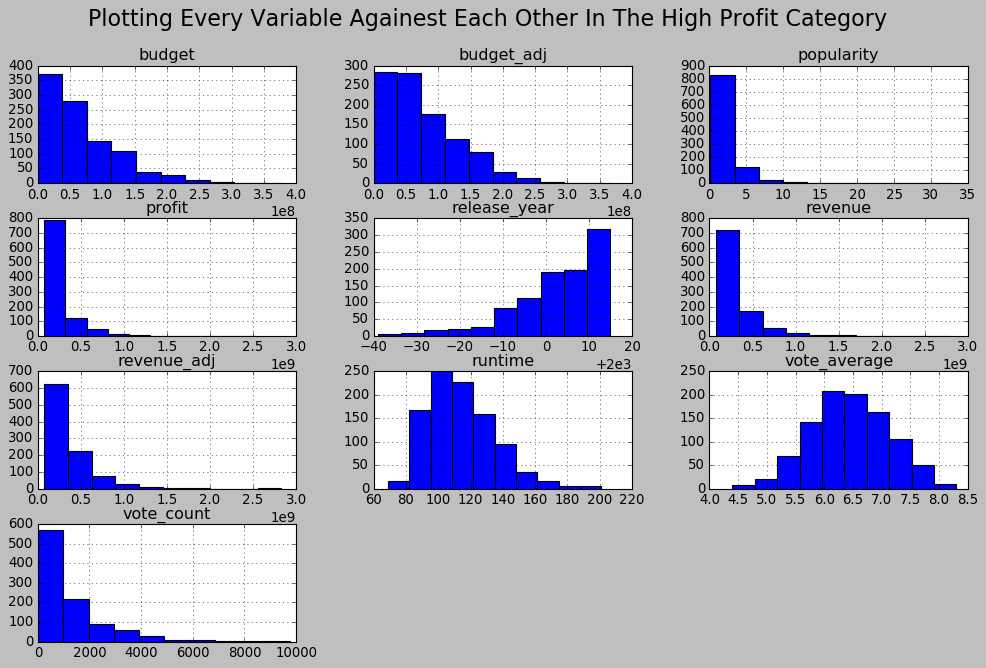

In [188]:
mask_high = high_profit.groupby(['director','genres']).max()
mask_high.hist(figsize=(15,9));
plot_title('Plotting every variable againest each other in the high profit category');
ax;

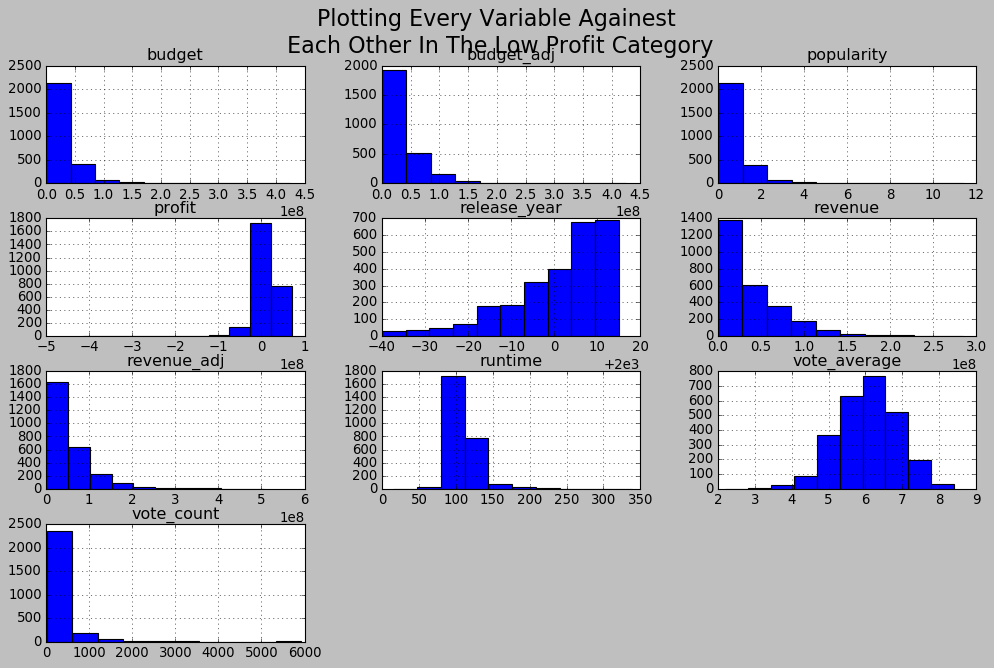

In [189]:
low_high = low_profit.groupby(['director','genres']).max()
low_high.hist(figsize=(15,9));
plot_title('Plotting every variable againest\n each other in the low profit category');
ax

In [155]:
high_profit.genres.max()

'Western|Drama|Adventure|Thriller'

In [156]:
low_profit.genres.max()

'Western|Thriller'

In [157]:
top_ten = high_profit.sort_values(by='profit',ascending=False)
top_ten[:10]

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
344,9.43,237000000.00,2781505847.00,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162.00,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.10,2009,240886902.89,2827123750.41,2544505847.00
3,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,1868178225.00
1746,4.36,200000000.00,1845034188.00,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194.00,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.30,1997,271692064.21,2506405735.42,1645034188.00
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,1363528810.00
4,9.34,190000000.00,1506249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,1316249360.00
1468,7.64,220000000.00,1519557910.00,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143.00,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.30,2012,208943741.90,1443191435.21,1299557910.00
1088,5.71,125000000.00,1327817822.00,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,"Harry, Ron and Hermione continue their quest t...",130.00,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.70,2011,121174755.32,1287183997.56,1202817822.00
14,5.94,280000000.00,1405035767.00,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,When Tony Stark tries to jumpstart a dormant p...,141.00,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.40,2015,257599886.66,1292632336.88,1125035767.00
1836,6.11,150000000.00,1274219009.00,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Young princess Anna of Arendelle dreams about ...,102.00,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.50,2013,140405002.91,1192711491.12,1124219009.00
2828,1.14,22000000.00,1106279658.00,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Angela Bennett is a freelance software enginee...,114.00,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,201,5.60,1995,31481271.08,1583049536.35,1084279658.00


In [158]:
low_ten = low_profit.sort_values(by='profit')
low_ten[:10]

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
678,0.25,425000000.00,11087569.00,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100.00,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.40,2010,425000000.00,11087569.00,-413912431.00
1910,1.21,255000000.00,89289910.00,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,The Texas Rangers chase down a gang of outlaws...,149.00,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.00,2013,238688504.95,83578333.82,-165710090.00
2445,0.95,145000000.00,25819961.00,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,Based on the 1836 standoff between a group of ...,137.00,Western|History|War,Imagine Entertainment|Touchstone Pictures,4/7/04,60,5.90,2004,167394582.97,29807735.20,-119180039.00
1182,0.92,150000000.00,38992758.00,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,"When Martians suddenly abduct his mom, mischie...",88.00,Adventure|Animation|Family,Walt Disney Animation Studios,3/9/11,129,5.50,2011,145409706.39,37799503.28,-111007242.00
1646,1.65,100000000.00,250.00,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,When a young Inuit hunter needlessly kills a b...,85.00,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,10/20/03,753,6.80,2003,118535264.48,296.34,-99999750.00
716,1.19,160000000.00,61698899.00,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,"In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...",102.00,Adventure|Fantasy|Action,Touchstone Pictures,8/27/99,275,6.20,1999,209448455.46,80767119.37,-98301101.00
1391,0.91,100000000.00,7103973.00,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,Ron Underwood,"The year is 2087, the setting is the moon. Edd...",95.00,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,8/15/02,75,4.60,2002,121226139.36,8611872.21,-92896027.00
2324,0.54,85000000.00,144.00,Charlotte's Web,Julia Roberts|Steve Buscemi|John Cleese|Oprah ...,Gary Winick,Wilbur the pig is scared of the end of the sea...,97.00,Comedy|Family|Fantasy,Paramount Pictures|Kerner Entertainment Company,12/15/06,161,6.00,2006,91941878.45,155.76,-84999856.00
2247,1.39,149000000.00,64459316.00,Flushed Away,Hugh Jackman|Kate Winslet|Ian McKellen|Jean Re...,David Bowers|Sam Fell,"London high-society mouse, Roddy is flushed do...",85.00,Adventure|Animation|Comedy|Family,Aardman Animations|DreamWorks Animation,10/22/06,488,6.00,2006,161168704.59,69723654.08,-84540684.00
963,1.47,130000000.00,49554002.00,Australia,Nicole Kidman|Hugh Jackman|Essie Davis|David W...,Baz Luhrmann,"Set in northern Australia before World War II,...",165.00,Drama,Bazmark Films|Ingenious Film Partners|Twentiet...,11/18/08,411,6.30,2008,131662262.40,50187630.88,-80445998.00


# Graph showing top and low ten movies vs profit

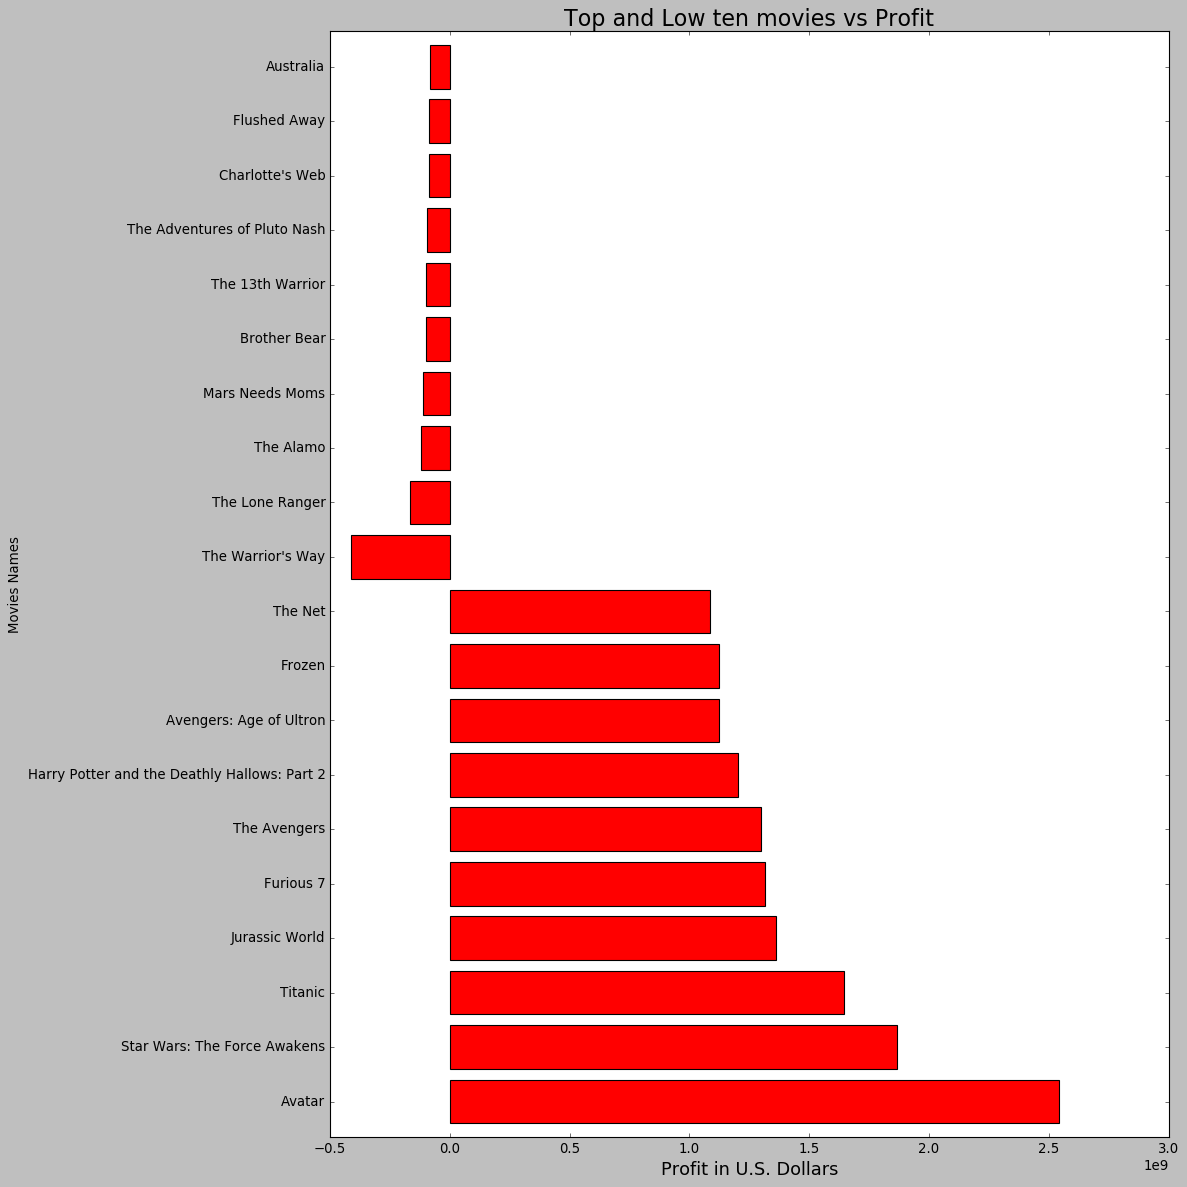

In [172]:
fig, ax = plt.subplots(figsize=(15,15))
plt.style.use('classic')

movies = top_ten.iloc[:10].set_index('original_title').append(low_ten.iloc[:10].set_index('original_title'));
movies[['profit']].plot.barh(ax=ax, width=0.8, legend=False, color="red");
ax.set_title('Top and Low ten movies vs Profit', fontsize = 20);  
ax.set_xlabel("Profit in U.S. Dollars", fontsize=16);
ax.set_ylabel('Movies Names')
plt.tight_layout()
ax;

so far we have checked some factors of the high and low profits movies and here is some of the conclusions :
    1. movie length shouldnt be so long, the high profitable one's ranging between 69 to 201 minutes.  
    2. in a span of 52 years a total number of 538 directors made movies of 463 genres profiting 243673869430.0 $
    3. while the low profit movies made 27871460189.0 in a span of 56 yeats by 1494 director of 820 genres
    4.'Zack Snyder' is one of the high profitable director in our dataset while ' FrÃ©dÃ©ric Jardin' in the opposite side
    5. 2015 had the most movies produced in both high and low profit sub datasets with 160 movies
    6. 'Western|Drama|Adventure|Thriller' was the most produced genre in the high profit category and 'Western|Thriller'
        in the low profit category
    7. Avatar is the highest profitable movie in the dataset while The Warrior's Way pretty the opposite 
    
    
This analysis is limited to this dataset and could represent different results if the dataset been analysed with a diff point of view duo to alot of factors,one of them after cleaning the data alot of 0's showed up in like 4 coulmns cause a reduction of the sample to 4k rows 


Resources : 
pandas documentaion 
matplotlib documentation
numpy documentaion
https://www.reddit.com/r/pythontips/comments/m32rnb/data_analysis_questions/
stack overflow
books:
Python Crash Course, 2nd Edition